# Analyse de répartition de richesse en France à travers le spectre des Iris 

Les données utilisées pour faire cette étude proviennent de l'INSEE se sont des données datant de 2025. On y retrouve des indicateurs de richesse au niveau des regions Iris . 

source: https://www.insee.fr/fr/statistiques/8229323 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Chargement des données et Dataprep

In [4]:
path = "dataset/BASE_TD_FILO_IRIS_2021_DEC.csv"


df = pd.read_csv(path, sep=";", decimal=",")
# Identify columns that contain numerical values with comma
num_cols = [col for col in df.columns if df[col].str.contains(",", na=False).any()]

# Convert them: replace "," -> "." then cast to float
for col in num_cols:
    df[col] = df[col].str.replace(",", ".", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

#columns with 60% of NAN
col_NaN = [c for c in df.columns if df[c].isnull().mean()*100 > 60.0]
print("number of columns with  60% of NaN",len(col_NaN))

quasi_constant = df.columns[
    df.apply(
        lambda x : x.value_counts(normalize=True).iloc[0]
        if x.dropna().size > 0 else 0
    ) > 0.90
]

print("\n nb de colonnes avec 90 % des données avec la même valeur :", len(quasi_constant))

number of columns with  60% of NaN 0

 nb de colonnes avec 90 % des données avec la même valeur : 0


In [5]:
# Count NA per column
na_counts = df.isna().sum().sort_values(ascending=False)
na_counts

DEC_RD21        2219
DEC_PBEN21      1760
DEC_PCHO21      1760
DEC_PTSA21      1760
DEC_S80S2021    1577
DEC_TP6021      1537
DEC_EQ21        1536
DEC_PPEN21      1536
DEC_PACT21      1536
DEC_PIMP21      1536
DEC_PAUT21      1536
DEC_GI21        1536
DEC_Q321           0
DEC_D121           0
DEC_INCERT21       0
DEC_Q121           0
IRIS               0
DEC_MED21          0
DEC_D221           0
DEC_D921           0
DEC_D821           0
DEC_D721           0
DEC_D421           0
DEC_D321           0
DEC_D621           0
DEC_NOTE21         0
dtype: int64

In [6]:
df = df.dropna()
na_counts = df.isna().sum().sort_values(ascending=False)
na_counts

IRIS            0
DEC_PIMP21      0
DEC_TP6021      0
DEC_INCERT21    0
DEC_Q121        0
DEC_MED21       0
DEC_Q321        0
DEC_EQ21        0
DEC_D121        0
DEC_D221        0
DEC_D321        0
DEC_D421        0
DEC_D621        0
DEC_D721        0
DEC_D821        0
DEC_D921        0
DEC_RD21        0
DEC_S80S2021    0
DEC_GI21        0
DEC_PACT21      0
DEC_PTSA21      0
DEC_PCHO21      0
DEC_PBEN21      0
DEC_PPEN21      0
DEC_PAUT21      0
DEC_NOTE21      0
dtype: int64

In [7]:
df.shape

(13674, 26)

In [8]:
df.describe()

,DEC_PIMP21,DEC_TP6021,DEC_EQ21,DEC_RD21,DEC_S80S2021,DEC_GI21,DEC_PACT21,DEC_PTSA21,DEC_PCHO21,DEC_PBEN21,DEC_PPEN21,DEC_PAUT21
count,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000
mean,53.881600,24.743235,0.819758,18.694669,9.932280,0.362767,68.288409,60.762608,3.254073,4.271727,26.124448,5.587143
std,14.230925,13.594410,0.191954,148.426722,6.484679,0.063986,9.691292,9.789245,1.256660,2.418706,8.940358,5.200029
min,7.000000,3.000000,0.410000,2.400000,2.800000,0.198000,19.400000,16.500000,0.400000,0.200000,-0.300000,0.000000
25%,43.000000,14.000000,0.670000,4.500000,5.900000,0.319000,62.300000,54.600000,2.400000,2.500000,19.600000,2.700000
50%,54.000000,22.000000,0.790000,6.200000,8.100000,0.358000,68.800000,61.400000,3.000000,3.800000,25.500000,4.300000
75%,65.000000,33.000000,0.940000,9.200000,11.500000,0.399000,75.100000,67.800000,3.900000,5.500000,31.900000,6.600000
max,91.000000,83.000000,1.870000,6617.000000,150.300000,0.803000,98.200000,96.500000,13.300000,31.700000,66.400000,69.500000


In [9]:
vars_of_interest = [
    "DEC_MED21",    # Revenu médian
    "DEC_Q121",     # Premier quartile
    "DEC_Q321",     # Troisième quartile
    "DEC_D121",     # Décile 1
    "DEC_D221",     # Décile 2
    "DEC_D321",     # Décile 3
    "DEC_TP6021",   # Taux de pauvreté
    "DEC_PIMP21"    # Part des impôts
]

subset = df[vars_of_interest].copy()
subset.head()


,DEC_MED21,DEC_Q121,DEC_Q321,DEC_D121,DEC_D221,DEC_D321,DEC_TP6021,DEC_PIMP21
0,19330,12610,26390,7760,11300,13900,29.0,43.0
1,16830,9730,24620,4680,8600,11070,39.0,42.0
2,19940,12220,27650,6500,10300,14220,29.0,47.0
3,25560,18350,35010,11960,16450,19860,14.0,62.0
4,19870,11280,30050,5250,9790,13120,31.0,42.0


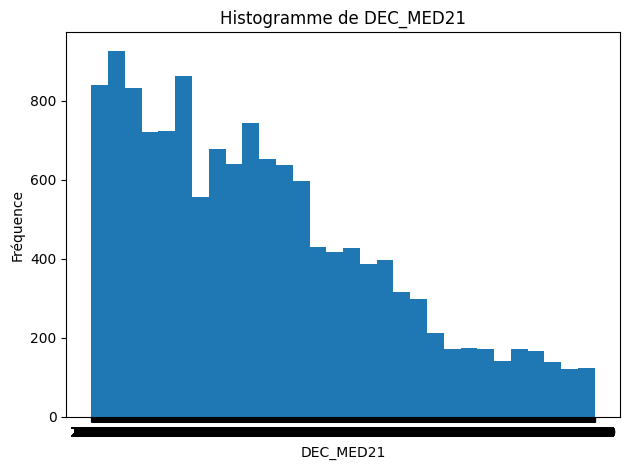

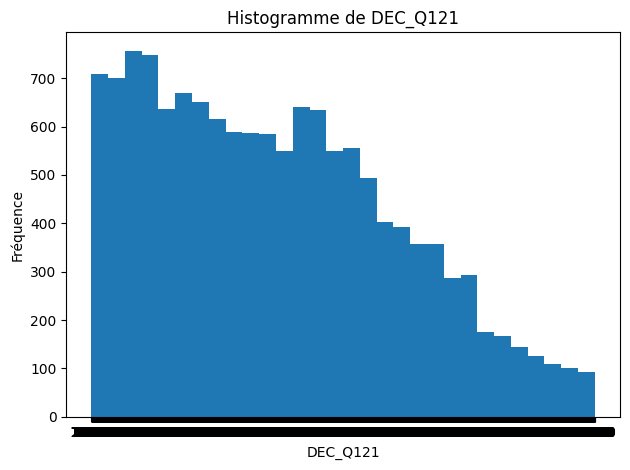

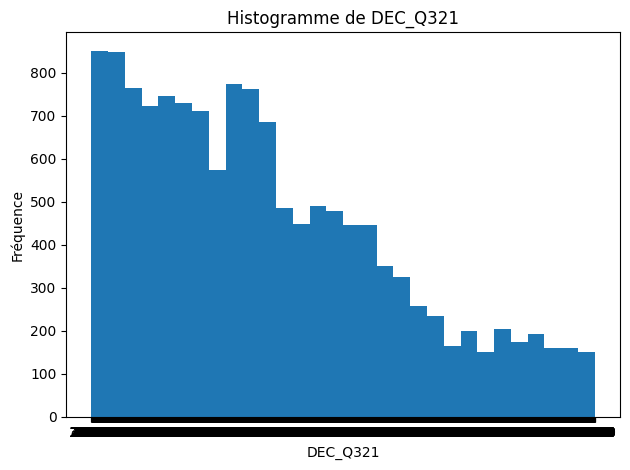

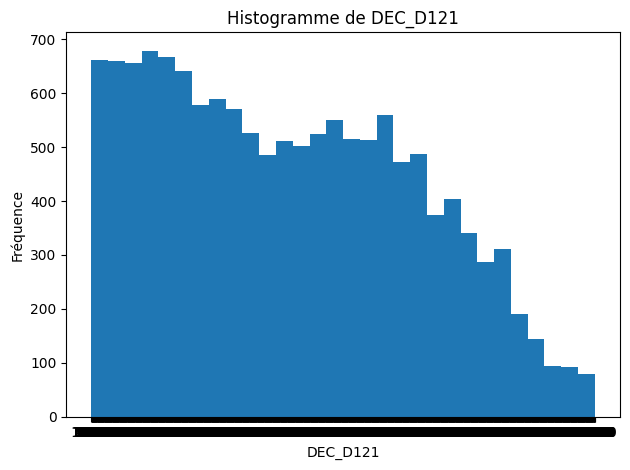

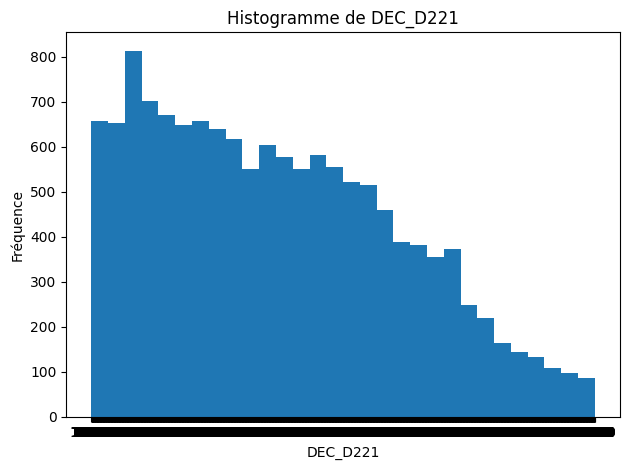

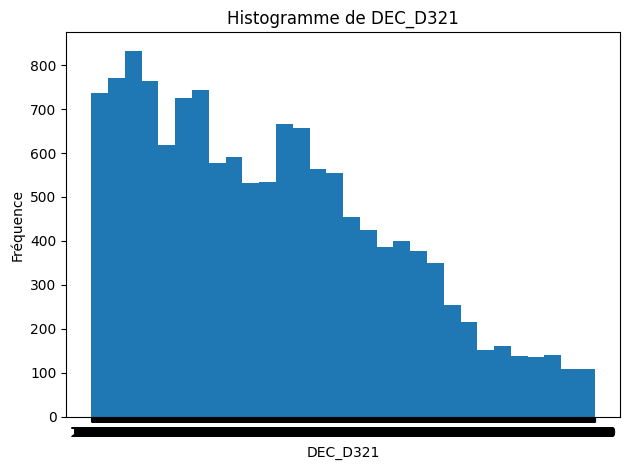

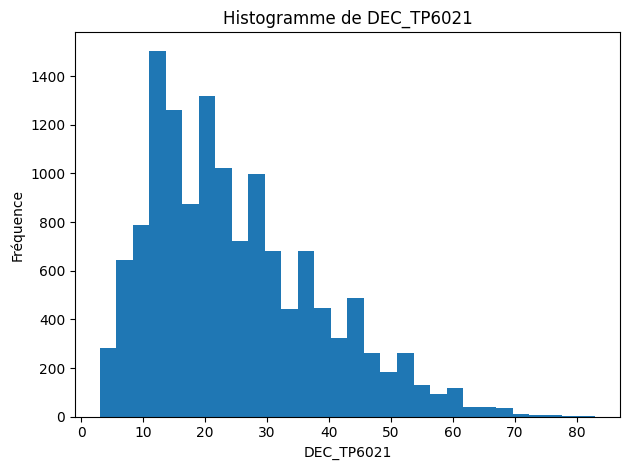

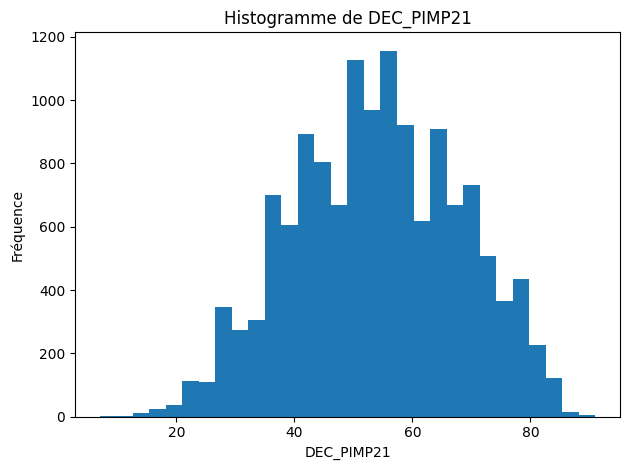

In [10]:
for col in vars_of_interest:
    data = subset[col]
    plt.figure()
    plt.hist(data, bins = 30)
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.tight_layout()
    plt.show()

On observe que les variables suivantes :

    - `DEC_MED21`   # Revenu médian
    - `DEC_Q121`    # Premier quartile
    - `DEC_Q321`    # Troisième quartile
    - `DEC_D121`    # Décile 1
    - `DEC_D221`    # Décile 2
    - `DEC_D321`    # Décile 3

semblent toutes suivre une même loi.

En revanche, les variables suivantes :

    - `DEC_TP6021`  # Taux de pauvreté
    - `DEC_PIMP21`  # Part des impôts

semblent, chacune, suivre une loi différente.

Nous proposons donc de construire trois estimateurs distincts afin d’estimer ces trois lois :
1. la loi du revenu médian (et des indicateurs associés),
2. la loi du taux de pauvreté,
3. la loi de la part des impôts.

D’après les histogrammes obtenus, nous formulons les hypothèses de lois paramétriques suivantes :
1. la première famille de variables suit une **loi gaussienne**,
2. le taux de pauvreté suit une **loi Gamma** ou une **loi log-normale**,
3. la part des impôts suit une **loi log-normale**.


In [ ]:
vars_of_interest = [
    "DEC_MED21",    # Revenu médian
    "DEC_TP6021",   # Taux de pauvreté
    "DEC_PIMP21"    # Part des impôts
]

# création des estimateurs 
sub = df[vars_of_interest].dropna()
sub.describe()

# Moyenne empirique pour les 3 variables
theta_med_emp = sub["DEC_MED21"].mean()
theta_pov_emp = sub["DEC_TP6021"].mean()
theta_imp_emp = sub["DEC_PIMP21"].mean()

theta_med_emp, theta_pov_emp, theta_imp_emp
